# **ZM → VALLE DE MÉXICO**



## **LIBRERÍAS A UTILIZAR**

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [2]:
!pip install mapclassify

In [3]:
!pip install libpysal

In [4]:
!pip install fiona
!pip install rtree
!pip install pygeos

In [5]:
import fiona
import rtree
import pygeos

In [6]:
!pip install geopandas

In [7]:
!pip install matplotlib

In [8]:
import numpy as np
import mapclassify
import pandas as pd
import libpysal as ps
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

/srv/conda/envs/notebook/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [9]:
!pip install contextily

In [10]:
import matplotlib.patches as mpatches
import contextily as ctx

## **BD: AGEBs SHAPE, INEGI 2020**

In [11]:
AGEBS= gpd.read_file('AgebsUrbana_ValleMex_ZM.shp')
print ('Forma de los datos:',AGEBS.shape)
AGEBS.head(5)

Forma de los datos: (5875, 8)


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,layer,path,geometry
0,0901000011716,09,010,0001,1716,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2787237.541 816989.461, 2787288.728 ..."
1,0901000012150,09,010,0001,2150,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2794154.458 823013.444, 2794155.774 ..."
2,0901000011133,09,010,0001,1133,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2795690.723 820050.788, 2795684.238 ..."
3,0901000011307,09,010,0001,1307,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2792584.475 815678.668, 2792624.325 ..."
4,0901000010281,09,010,0001,0281,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2788845.392 823526.074, 2788840.549 ..."


In [12]:
AGEBS.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## **BD: ÁREAS VERDES, INEGI 2020**

In [13]:
Area_Verde= gpd.read_file('SIA_ValleMex_ZM.shp')
Area_Verde.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CONDICION,GEOGRAFICO,NOMSERV,TIPO,CVE_SERV,AMBITO,layer,path,geometry
0,090100001,09,010,0001,No Aplica,Camellón,Ninguno,Área Verde,44,Urbana,09sia,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2793948.499 818932.880, 2793958.600 ..."
1,090100001,09,010,0001,No Aplica,Camellón,Ninguno,Área Verde,43,Urbana,09sia,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2793322.347 823315.081, 2793336.471 ..."
2,090100001,09,010,0001,No Aplica,Camellón,Ninguno,Área Verde,760,Urbana,09sia,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2793865.404 825284.980, 2793865.707 ..."
3,090100001,09,010,0001,No Aplica,Camellón,Ninguno,Área Verde,759,Urbana,09sia,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2793358.765 825213.372, 2793362.791 ..."
4,090100001,09,010,0001,No Aplica,Camellón,Ninguno,Área Verde,677,Urbana,09sia,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2788991.964 821267.297, 2788991.631 ..."


In [14]:
Area_Verde.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## **BD: MEDICIÓN DE POBREZA, CONEVAL 2015**

In [15]:
Pobreza_ageb = pd.read_csv ('Pobreza_ValleMX_csv.csv')
Pobreza_ageb.head(5)

,cve_ent,nom_ent,cve_mun,nom_mun,cvegeo,cve_ageb,pobreza,pobreza_ext
0,13,Hidalgo,13069,Tizayuca,130690001004A,004A,"(34, 50)","(0, 20)"
1,13,Hidalgo,13069,Tizayuca,1.3069E+12,0069,"(50, 70)","(0, 20)"
2,13,Hidalgo,13069,Tizayuca,1.3069E+12,0073,"(18, 34)","(0, 20)"
3,13,Hidalgo,13069,Tizayuca,1.3069E+12,0088,"(18, 34)","(0, 20)"
4,13,Hidalgo,13069,Tizayuca,130690001011A,011A,"(50, 70)","(0, 20)"


## **HOMOLOGAR BASES DE DATOS**

In [16]:
AGEBS = AGEBS.rename({'CVEGEO':'Clave_AGEB'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'cvegeo':'Clave_AGEB'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'pobreza':'Rango_Pobreza'}, axis=1)
Pobreza_ageb = Pobreza_ageb.rename({'pobreza_ext':'Rango_PExtrema'}, axis=1)

In [17]:
Pobreza_ageb=Pobreza_ageb.dropna()

In [18]:
Pobreza_ageb['Min_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('(\d+)').astype(int)
Pobreza_ageb['Max_RP'] = Pobreza_ageb.Rango_Pobreza.str.extract('( \d+)').astype(int)
Pobreza_ageb['Pobre_AV'] = ((Pobreza_ageb['Min_RP'] + Pobreza_ageb['Max_RP']) / 2)
Pobreza_ageb2 = Pobreza_ageb[['Clave_AGEB','nom_mun', 'Rango_Pobreza', 'Pobre_AV' ]]

In [19]:
Pobreza_ageb2.set_index('Clave_AGEB')
AGEBS.set_index('Clave_AGEB')

,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,layer,path,geometry
Clave_AGEB,,,,,,,
0901000011716,09,010,0001,1716,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2787237.541 816989.461, 2787288.728 ..."
0901000012150,09,010,0001,2150,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2794154.458 823013.444, 2794155.774 ..."
0901000011133,09,010,0001,1133,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2795690.723 820050.788, 2795684.238 ..."
0901000011307,09,010,0001,1307,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2792584.475 815678.668, 2792624.325 ..."
0901000010281,09,010,0001,0281,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2788845.392 823526.074, 2788840.549 ..."
...,...,...,...,...,...,...,...
1306900010980,13,069,0001,0980,AgebsUrbana_Hidalgo,C:\100 ciudades\Capas por ZM\CDMX\AgebsUrbana_...,"POLYGON ((2815474.294 877055.364, 2815464.948 ..."
1306900440764,13,069,0044,0764,AgebsUrbana_Hidalgo,C:\100 ciudades\Capas por ZM\CDMX\AgebsUrbana_...,"POLYGON ((2816649.796 877869.992, 2816688.223 ..."
130690050118A,13,069,0050,118A,AgebsUrbana_Hidalgo,C:\100 ciudades\Capas por ZM\CDMX\AgebsUrbana_...,"POLYGON ((2817425.392 877468.182, 2817333.955 ..."


In [20]:
Pobreza_AGEB = AGEBS.merge(Pobreza_ageb2 ,left_on='Clave_AGEB', right_on='Clave_AGEB',how='left')
Pobreza_A = Pobreza_AGEB.copy()
print ('Forma de los datos:',Pobreza_AGEB.shape)
Pobreza_AGEB.head()

Forma de los datos: (5875, 11)


,Clave_AGEB,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,layer,path,geometry,nom_mun,Rango_Pobreza,Pobre_AV
0,0901000011716,09,010,0001,1716,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2787237.541 816989.461, 2787288.728 ...",�lvaro Obreg�n,"(34, 50)",42.0
1,0901000012150,09,010,0001,2150,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2794154.458 823013.444, 2794155.774 ...",�lvaro Obreg�n,"(18, 34)",26.0
2,0901000011133,09,010,0001,1133,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2795690.723 820050.788, 2795684.238 ...",�lvaro Obreg�n,"(0, 18)",9.0
3,0901000011307,09,010,0001,1307,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2792584.475 815678.668, 2792624.325 ...",�lvaro Obreg�n,"(0, 18)",9.0
4,0901000010281,09,010,0001,0281,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2788845.392 823526.074, 2788840.549 ...",�lvaro Obreg�n,"(0, 18)",9.0


In [21]:
Pobreza_A = Pobreza_A.fillna(0)
Pobreza_A.head()

,Clave_AGEB,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,layer,path,geometry,nom_mun,Rango_Pobreza,Pobre_AV
0,0901000011716,09,010,0001,1716,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2787237.541 816989.461, 2787288.728 ...",�lvaro Obreg�n,"(34, 50)",42.0
1,0901000012150,09,010,0001,2150,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2794154.458 823013.444, 2794155.774 ...",�lvaro Obreg�n,"(18, 34)",26.0
2,0901000011133,09,010,0001,1133,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2795690.723 820050.788, 2795684.238 ...",�lvaro Obreg�n,"(0, 18)",9.0
3,0901000011307,09,010,0001,1307,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2792584.475 815678.668, 2792624.325 ...",�lvaro Obreg�n,"(0, 18)",9.0
4,0901000010281,09,010,0001,0281,09a,C:/100 ciudades/Capas por ZM/CDMX/09_ciudaddem...,"POLYGON ((2788845.392 823526.074, 2788840.549 ...",�lvaro Obreg�n,"(0, 18)",9.0


In [22]:
Pobreza_AGEB = Pobreza_AGEB.dropna()

In [23]:
Pobreza_A.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
Pobreza_A=Pobreza_A.to_crs(epsg=3857)

In [25]:
mapclassify.NaturalBreaks(Pobreza_A['Pobre_AV'].values, k=5)

NaturalBreaks         

   Interval      Count
----------------------
[ 0.00,  0.00] |  3228
( 0.00,  9.00] |  1106
( 9.00, 26.00] |   702
(26.00, 42.00] |   561
(42.00, 85.00] |   278

## **MAPA DE POBREZA POR AGEBs**

In [ ]:
fig, ax = plt.subplots(1,figsize=(16, 18)) 
Base = Pobreza_A.plot(column='Pobre_AV', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Rango de Pobreza en la ZM del Valle de México, 2015 (%)", size = 25)
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3) 
plt.show()

In [ ]:
Pobreza_AGEB=Pobreza_AGEB.to_crs(epsg=3857)

## **MAPA DE POBREZA EXTREMA POR AGEBs**

In [ ]:
fig, ax = plt.subplots(1,figsize=(16, 18)) 
Base = Pobreza_AGEB.plot(column='Pobre_AV', 
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
plt.title("Rango de Pobreza en la ZM del Valle de México, 2015 (%)", size = 25)
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3) 
plt.show()

## **ÁREAS VERDES → OPEN STREET MAPS**

In [26]:
!pip install osmnx
import osmnx as ox

In [27]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-ycxm6z37
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ycxm6z37


In [29]:
tags = {'leisure': True}
AreaV = ox.geometries_from_bbox(19.7072, 19.1769, -98.8138, -99.4414, tags)
AreaV.head(10)

created_by                    geometry highway  \
element_type osmid                                                       
node         1477979993        NaN  POINT (-99.06554 19.39077)     NaN   
             1477980000        NaN  POINT (-99.06268 19.39482)     NaN   
             1478000751        NaN  POINT (-99.06587 19.38531)     NaN   
             1478000752        NaN  POINT (-99.06549 19.38634)     NaN   
             1478075818        NaN  POINT (-99.09581 19.39583)     NaN   
             1478210745        NaN  POINT (-99.06059 19.39811)     NaN   
             2135492326        NaN  POINT (-99.07448 19.35645)     NaN   
             2326391482        NaN  POINT (-99.11874 19.23248)     NaN   
             2426034670        NaN  POINT (-99.10773 19.25552)     NaN   
             2493262736        NaN  POINT (-99.11246 19.40645)     NaN   

                               leisure  \
element_type osmid                       
node         1477979993     playground   
             1477980000     playground   
             1478000751  sports_centre   
             1478000752     playground   
             1478075818     playground   
             1478210745     playground   
             2135492326     playground   
             2326391482     playground   
             2426034670  swimming_pool   
             2493262736           park   

                                                            name     sport  \
element_type osmid                                                           
node         1477979993                                      NaN       NaN   
             1477980000                                      NaN       NaN   
             1478000751                                      NaN       NaN   
             1478000752                                      NaN       NaN   
             1478075818                                      NaN       NaN   
             1478210745               Parque ecológico Iztacalco       NaN   
             2135492326                                      NaN       NaN   
             2326391482                             Plaza civica       NaN   
             2426034670                                      NaN  swimming   
             2493262736  Plaza Cívica y Recreativa Miguel Alemán       NaN   

                        addr:street amenity operator access  ...  \
element_type osmid                                           ...   
node         1477979993         NaN     NaN      NaN    NaN  ...   
             1477980000         NaN     NaN      NaN    NaN  ...   
             1478000751         NaN     NaN      NaN    NaN  ...   
             1478000752         NaN     NaN      NaN    NaN  ...   
             1478075818         NaN     NaN      NaN    NaN  ...   
             1478210745         NaN     NaN      NaN    NaN  ...   
             2135492326         NaN     NaN      NaN    NaN  ...   
             2326391482         NaN     NaN      NaN    NaN  ...   
             2426034670         NaN     NaN      NaN    NaN  ...   
             2493262736         NaN     NaN      NaN    NaN  ...   

                        addr:district building:part climbing:sport bridge  \
element_type osmid                                                          
node         1477979993           NaN           NaN            NaN    NaN   
             1477980000           NaN           NaN            NaN    NaN   
             1478000751           NaN           NaN            NaN    NaN   
             1478000752           NaN           NaN            NaN    NaN   
             1478075818           NaN           NaN            NaN    NaN   
             1478210745           NaN           NaN            NaN    NaN   
             2135492326           NaN           NaN            NaN    NaN   
             2326391482           NaN           NaN            NaN    NaN   
             2426034670           NaN           NaN            NaN    NaN   
             2493262736      

In [ ]:
tags = {'leisure': True}
AreaV1 = ox.geometries_from_place('Estado de México', tags)
AreaV1.head(10)

## **SOLO PARQUES → OPEN STREET MAPS**

In [30]:
Parque= AreaV.drop(AreaV[AreaV['leisure']!='park'].index)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
Parque.head()

created_by                    geometry highway  \
element_type osmid                                                       
node         2493262736        NaN  POINT (-99.11246 19.40645)     NaN   
             2682372533        NaN  POINT (-99.07314 19.36855)     NaN   
             4567134714        NaN  POINT (-99.09089 19.39562)     NaN   
             4622449893        NaN  POINT (-99.03531 19.25642)     NaN   
             4988283725        NaN  POINT (-98.97979 19.33320)     NaN   

                        leisure                                     name  \
element_type osmid                                                         
node         2493262736    park  Plaza Cívica y Recreativa Miguel Alemán   
             2682372533    park                        Módulo de policía   
             4567134714    park                           El Revolcadero   
             4622449893    park     Deportivo de San Luis Tlaxialtemalco   
             4988283725    park                                      NaN   

                        sport  addr:street amenity operator access  ...  \
element_type osmid                                                  ...   
node         2493262736   NaN          NaN     NaN      NaN    NaN  ...   
             2682372533   NaN  Av. Jalisco  police    SSPDF    NaN  ...   
             4567134714   NaN          NaN     NaN      NaN    NaN  ...   
             4622449893   NaN          NaN     NaN      NaN    NaN  ...   
             4988283725   NaN          NaN     NaN      NaN    NaN  ...   

                        addr:district building:part climbing:sport bridge  \
element_type osmid                                                          
node         2493262736           NaN           NaN            NaN    NaN   
             2682372533           NaN           NaN            NaN    NaN   
             4567134714           NaN           NaN            NaN    NaN   
             4622449893           NaN           NaN            NaN    NaN   
             4988283725           NaN           NaN            NaN    NaN   

                        golf:course:holes golf:course:par  \
element_type osmid                                          
node         2493262736               NaN             NaN   
             2682372533               NaN             NaN   
             4567134714               NaN             NaN   
             4622449893               NaN             NaN   
             4988283725               NaN             NaN   

                        historic:civilization site_type addr:suburb  \
element_type osmid                                                    
node         2493262736                   NaN       NaN         NaN   
             2682372533                   NaN       NaN         NaN   
             4567134714                   NaN       NaN         NaN   
             4622449893                   NaN       NaN         NaN   
             4988283725                   NaN       NaN         NaN   

                        sports_complex  
element_type osmid                      
node         2493262736            NaN  
             2682372533            NaN  
             4567134714            NaN  
             4622449893            NaN  
             4988283725            NaN  

[5 rows x 172 columns]

In [32]:
Parque.crs

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
frames = [Parque]

In [34]:
Parques=pd.concat(frames)

In [35]:
Parques.shape

(4636, 172)

In [36]:
Parques=Parques.to_crs(epsg=6372)
Parques.head()
AGEBS=AGEBS.to_crs(epsg=6372)

## **PLOTEO PARQUES → INEGI**

In [39]:
colors = ['#A1E2E6', '#E6BDA1', '#B3A16B', '#678072', '#524A4A']

In [ ]:
Parque_Inegi = gpd.clip(Area_Verde, AGEBS)
Parque_Inegi.head()

In [ ]:
Parques_Leon= AGEBS.plot(color= colors[2], alpha=.2, figsize=(16, 18))
Parque_Inegi.plot(ax=Parques_Leon, color= '#039e7d',linewidth= 1.5)
plt.title("ZM del Valle de México\n Áreas Verdes de INEGI, 2020", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

## **PLOTEO PARQUES → OPEN STREET MAPS**

In [37]:
Parque_Clip = gpd.clip(Parques, AGEBS)
Parque_Clip.head()

created_by                        geometry highway  \
element_type osmid                                                           
node         2493262736        NaN  POINT (2802392.213 826215.468)     NaN   
             2682372533        NaN  POINT (2806595.436 822116.335)     NaN   
             4567134714        NaN  POINT (2804675.501 825066.046)     NaN   
             4622449893        NaN  POINT (2810813.637 809822.158)     NaN   
             4988283725        NaN  POINT (2816454.058 818417.877)     NaN   

                        leisure                                     name  \
element_type osmid                                                         
node         2493262736    park  Plaza Cívica y Recreativa Miguel Alemán   
             2682372533    park                        Módulo de policía   
             4567134714    park                           El Revolcadero   
             4622449893    park     Deportivo de San Luis Tlaxialtemalco   
             4988283725    park                                      NaN   

                        sport  addr:street amenity operator access  ...  \
element_type osmid                                                  ...   
node         2493262736   NaN          NaN     NaN      NaN    NaN  ...   
             2682372533   NaN  Av. Jalisco  police    SSPDF    NaN  ...   
             4567134714   NaN          NaN     NaN      NaN    NaN  ...   
             4622449893   NaN          NaN     NaN      NaN    NaN  ...   
             4988283725   NaN          NaN     NaN      NaN    NaN  ...   

                        addr:district building:part climbing:sport bridge  \
element_type osmid                                                          
node         2493262736           NaN           NaN            NaN    NaN   
             2682372533           NaN           NaN            NaN    NaN   
             4567134714           NaN           NaN            NaN    NaN   
             4622449893           NaN           NaN            NaN    NaN   
             4988283725           NaN           NaN            NaN    NaN   

                        golf:course:holes golf:course:par  \
element_type osmid                                          
node         2493262736               NaN             NaN   
             2682372533               NaN             NaN   
             4567134714               NaN             NaN   
             4622449893               NaN             NaN   
             4988283725               NaN             NaN   

                        historic:civilization site_type addr:suburb  \
element_type osmid                                                    
node         2493262736                   NaN       NaN         NaN   
             2682372533                   NaN       NaN         NaN   
             4567134714                   NaN       NaN         NaN   
             4622449893                   NaN       NaN         NaN   
             4988283725                   NaN       NaN         NaN   

                        sports_complex  
element_type osmid                      
node         2493262736            NaN  
             2682372533            NaN  
             4567134714            NaN  
             4622449893            NaN  
             4988283725            NaN  

[5 rows x 172 columns]

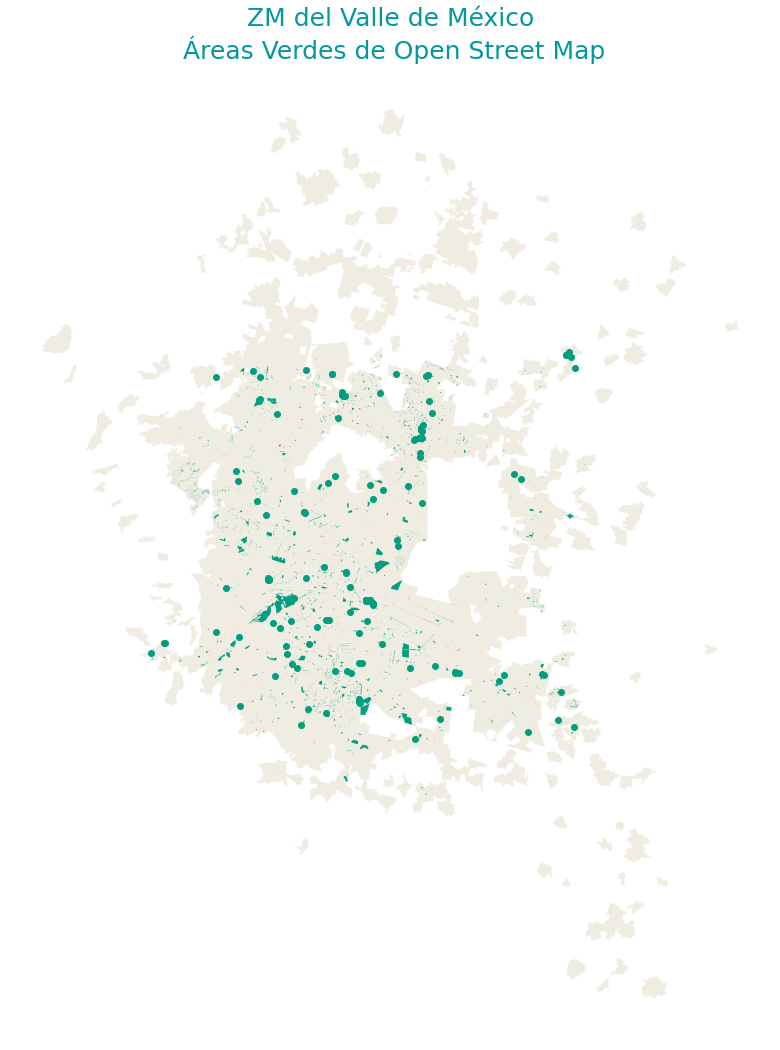

In [40]:
Parques_LEON_OSM2= AGEBS.plot(color=colors[2], alpha=0.2, figsize=(16, 18))
Parque_Clip.plot(ax=Parques_LEON_OSM2, color='#039e7d')
plt.title("ZM del Valle de México\n Áreas Verdes de Open Street Map", fontsize=25, color= '#03989e')
plt.axis('off')
plt.show()

In [41]:
AreaV.crs

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
AreaV_OSM=Parque_Clip.to_crs(epsg=3857)

## **PLOTEO → INEGI & POBREZA**

In [ ]:
Parque_Clips = gpd.clip(Area_Verde, AGEBS)
Parque_Clips.head()

In [ ]:
AreaV_INEGI=Parque_Clips.to_crs(epsg=3857)

In [ ]:
fig, ax = plt.subplots(1,figsize=(16, 18)) 
Base = Pobreza_A.plot(column='Pobre_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_INEGI.plot(ax=Base, color='#039e7d')
plt.title("Rango de Pobreza en el Valle de México, 2015 (%) \n Áreas Verdes de INEGI, 2020", fontsize=25, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
plt.show()

## **PLOTEO → OSM & POBREZA**

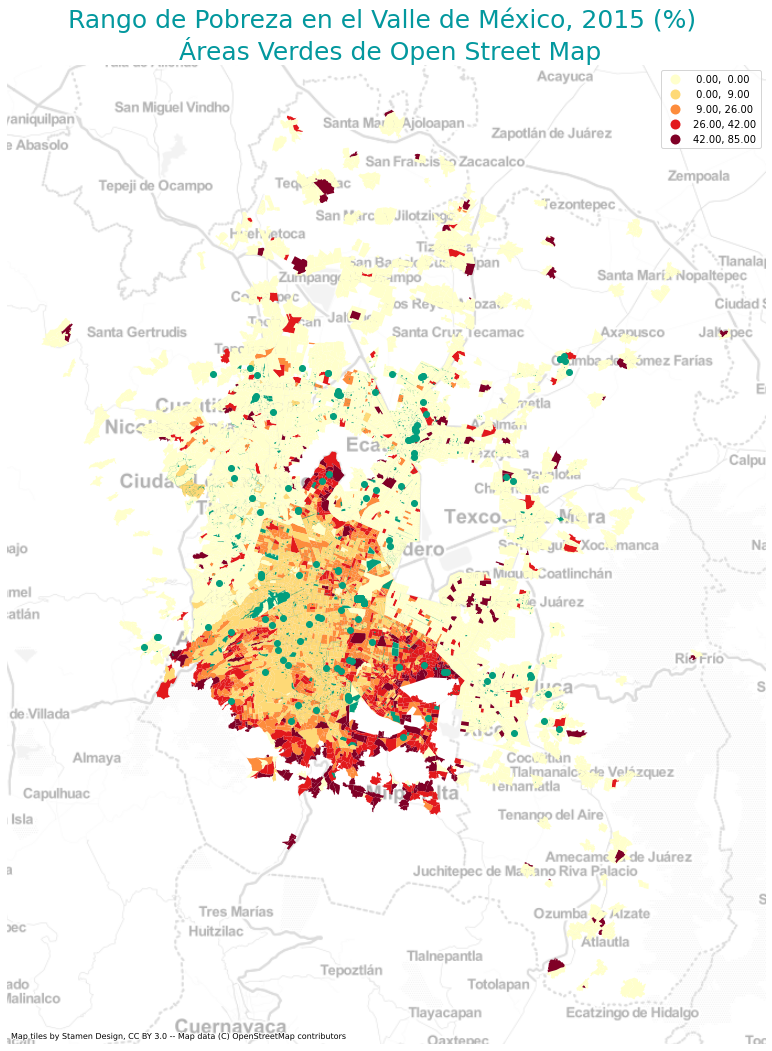

In [43]:
fig, ax = plt.subplots(1,figsize=(16, 18)) 
Base = Pobreza_A.plot(column='Pobre_AV',  
              alpha=1, 
              scheme='NaturalBreaks', 
              legend=True, 
              cmap='YlOrRd',
              classification_kwds={'k':5},
              figsize=(8,8),
              ax=ax)
AreaV_OSM.plot(ax=Base, color='#039e7d')
plt.title("Rango de Pobreza en el Valle de México, 2015 (%) \n Áreas Verdes de Open Street Map", fontsize=25, color = '#03989e')
ax.set_axis_off() 
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
plt.show()